In [ ]:
# Dependencies and Setup
import hvplot.pandas
import holoviews


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import geoapify_key


In [217]:
hap_df = pd.read_csv('./Resources/2022.csv')
print(hap_df.columns)
hap_df = hap_df[['Country', 'Happiness score']]
hap_df.columns = ['Country', 'Happiness Score']
cost_df = pd.read_csv('./Resources/Cost_of_Living_Index_2022.csv')
print(cost_df.columns)
cost_df = cost_df[['Country', 'Local Purchasing Power Index', 'Cost of Living Index']]

print(hap_df.head())
print(cost_df.head())

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')
Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')
       Country Happiness Score
0      Finland           7,821
1      Denmark           7,636
2      Iceland           7,557
3  Switzerland           7,512
4  Netherlands           7,415
       Country  Local Purchasing Power Index  Cost of Living Index
0  Afghanistan                         23.04                 20.37
1      Albania                         30.19                 35.50
2      Algeria        

In [ ]:
# Merging
mHapCost_df = hap_df.merge(cost_df, how='inner', on='Country')
mHapCost_df.head()

In [ ]:
mHapCost_df.count()

In [ ]:
capCoord_df = pd.read_csv('./Resources/country-capitals.csv', on_bad_lines='skip')
print(capCoord_df.columns)
del capCoord_df['CountryCode']
del capCoord_df['ContinentName']
capCoord_df.columns = ['Country', 'Capital', 'Latitude', 'Longitude']
print(capCoord_df.columns)

capCoord_df

In [ ]:
mHapCost_df = mHapCost_df.merge(capCoord_df, how='inner', on='Country')
mHapCost_df

In [ ]:
mHapCost_df['Happiness Score'] = mHapCost_df['Happiness Score'].str.replace(",", "").astype('float')
mHapCost_df.dtypes


In [ ]:

srt_df= mHapCost_df.sort_values(by='Country')
print(srt_df.head(20))

In [ ]:
# %%capture --no-display
print(mHapCost_df.columns)
happiestplot = mHapCost_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.1,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)
happiestplot

In [ ]:
top20Hap = mHapCost_df.sort_values('Happiness Score', ascending=False).head(20)
top20Hap

In [ ]:
top20HapPlot = top20Hap.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.15,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)
top20HapPlot

In [ ]:
bottom20Hap = mHapCost_df.sort_values('Happiness Score').head(20)
bottom20Hap

In [ ]:
bottom20HapPlot = bottom20Hap.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.3,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)
bottom20HapPlot

In [ ]:
mHapCost_df.count()

In [ ]:
crime_df = pd.read_csv('./Resources/WorldCrimeIndex.csv', encoding='utf-8')

crime_df.head()

In [ ]:
df = crime_df['City'].str.split(", ", expand=True)
# crime_df.rename(columns={'City':"Country"})
df.head()

In [ ]:
crime_df['Country'] = df[1]
del crime_df['City']
crime_df = crime_df.groupby('Country').mean()
crime_df.head(30)

In [ ]:
mHapCosCrim = mHapCost_df.copy().merge(crime_df, how='inner', on='Country')
print(crime_df.dtypes)
print(mHapCost_df.dtypes)
print(mHapCosCrim.count())
mHapCosCrim.head()


In [ ]:
print(mHapCosCrim.count())
no_na_df = mHapCosCrim.dropna()
no_na_df.count()

In [ ]:
(m, y, r, p, std) = linregress(mHapCosCrim['Cost of Living Index'], mHapCosCrim['Happiness Score'])
yregressLin = m * mHapCosCrim['Cost of Living Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Cost of Living Index', y = 'Happiness Score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearon's R Coefficient: {r}")
plt.plot(mHapCosCrim['Cost of Living Index'], yregressLin, color='red')
plt.annotate(equation, (65, 4000), color='red', size = 14)
plt.show()

In [ ]:
(m, y, r, p, std) = linregress(mHapCosCrim['Crime Index'], mHapCosCrim['Happiness Score'])
yregressLin = m * mHapCosCrim['Crime Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Crime Index', y = 'Happiness Score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearon's R Coefficient: {r}")
plt.plot(mHapCosCrim['Crime Index'], yregressLin, color='red')
plt.annotate(equation, (15, 3000), color='red', size = 14)
plt.show()

In [ ]:
(m, y, r, p, std) = linregress(mHapCosCrim['Local Purchasing Power Index'], mHapCosCrim['Happiness Score'])
yregressLin = m * mHapCosCrim['Local Purchasing Power Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Local Purchasing Power Index', y = 'Happiness Score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearon's R Coefficient: {r}")
plt.plot(mHapCosCrim['Local Purchasing Power Index'], yregressLin, color='red')
plt.annotate(equation, (55, 3000), color='red', size = 14)
plt.show()

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8), tight_layout=True)
ax = fig.add_subplot(projection='3d')
x = mHapCosCrim['Crime Index']
xlabel = 'Crime Index'
y = mHapCosCrim['Local Purchasing Power Index']
ylabel = 'Purchasing Power'
z = mHapCosCrim['Happiness Score']
zlabel = 'Happiness Score'
colors = np.random.rand(367)
bin = [3000, 3500, 4000, 4500, 5000 ]
topHap = mHapCosCrim['Happiness Score'].sort_values(ascending=False).head(1).values[0]
topPurch = mHapCosCrim['Local Purchasing Power Index'].sort_values(ascending=False).head(1).values[0]
topCrime = mHapCosCrim['Crime Index'].sort_values(ascending=False).head(1).values[0]
print(topCrime)
red = mHapCosCrim['Happiness Score']/topHap
green = mHapCosCrim['Local Purchasing Power Index']/topCrime
blue = mHapCosCrim['Crime Index']/topPurch 
print(red.head())
print(green.head())
print(blue.head())
triple = (red+ green+blue)/3
print(len(triple))
print(triple.head())

ax.scatter(x, y, z, cmap='plasma', c=triple)# xlabel=xlabel, ylabel=ylabel)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
plt.figure(figsize=(20, 20))
plt.subplots_adjust(right=0.5, bottom=0.5)
plt.show()

In [ ]:
bottomHap = mHapCosCrim['Happiness Score'].sort_values().head(1).values[0]
bottomPurch = mHapCosCrim['Local Purchasing Power Index'].sort_values().head(1).values[0]
bottompSafety = mHapCosCrim['Safety Index'].sort_values().head(1).values[0]


topHap = mHapCosCrim['Happiness Score'].sort_values(ascending=False).head(1).values[0]
topPurch = mHapCosCrim['Local Purchasing Power Index'].sort_values(ascending=False).head(1).values[0]
topSafety = mHapCosCrim['Safety Index'].sort_values(ascending=False).head(1).values[0]

mHapCosCrim['Standardized Happiness'] = (mHapCosCrim['Happiness Score'] - bottomHap) / (topHap - bottomHap)
mHapCosCrim['Standardized Local Purchasing Power'] = (mHapCosCrim['Local Purchasing Power Index'] - bottomPurch) / (topPurch - bottomPurch)
mHapCosCrim['Standardized Safety'] = (mHapCosCrim['Safety Index'] - bottompSafety) / (topSafety - bottomPurch)
mHapCosCrim.head()


<IPython.core.display.Javascript object>


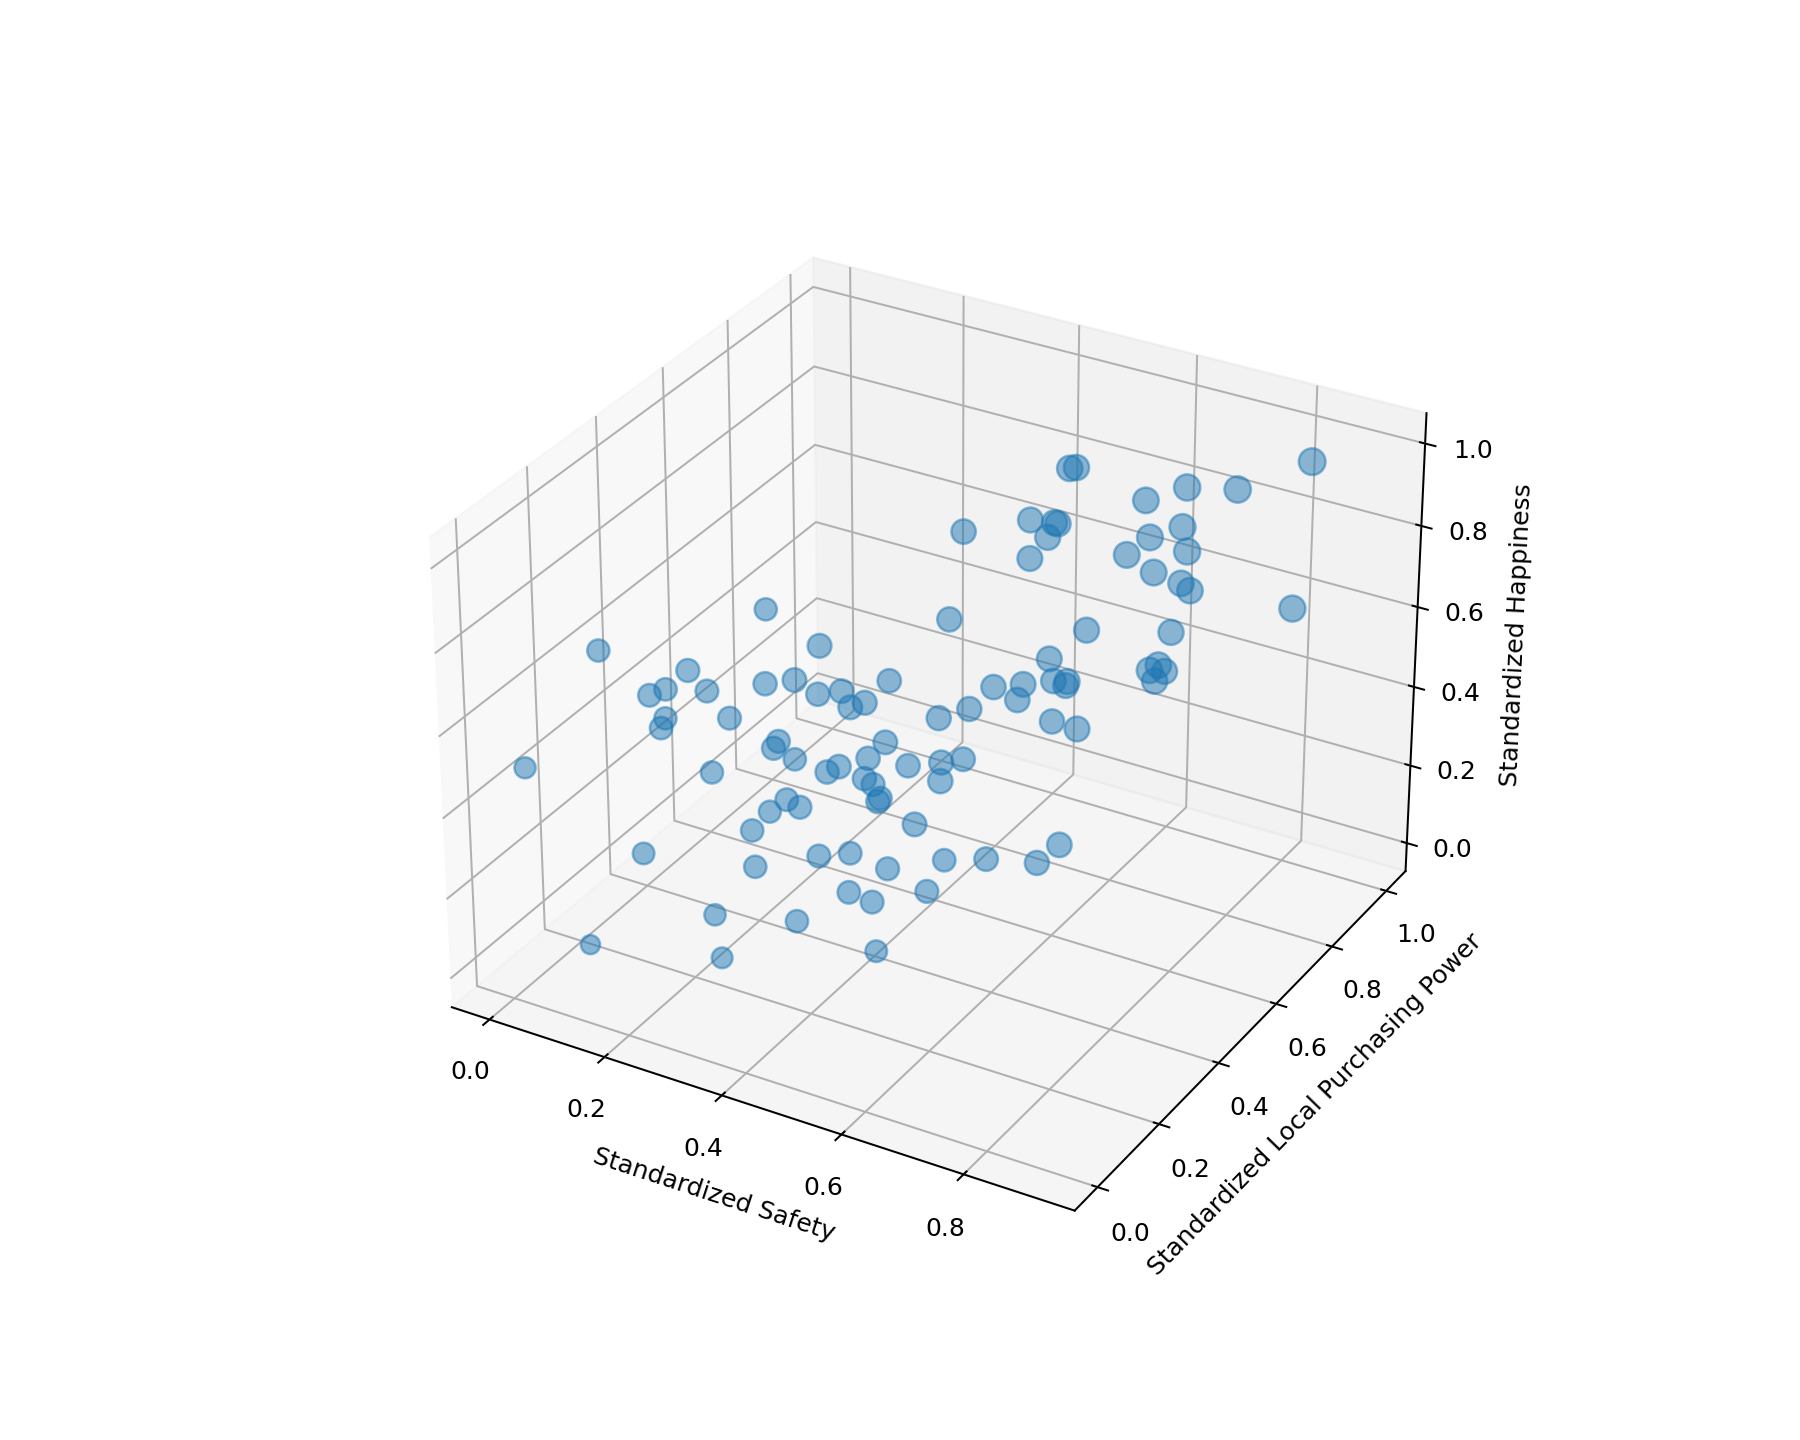

Text(0.5, 0, 'Standardized Happiness')

In [158]:
%matplotlib notebook
weightHap = 1
weightPurch = 1
weightSafety = 1

plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
mHapCosCrim['Equally Weighted Safety, Purchasing, and Happiness'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
fg = ax.scatter3D(mHapCosCrim['Standardized Safety'], 
                  mHapCosCrim['Standardized Local Purchasing Power'],
                  mHapCosCrim['Standardized Happiness'], 
                  s = 40 * mHapCosCrim['Equally Weighted Safety, Purchasing, and Happiness'],
                  alpha = 0.5,
#                   c = 
                  
                  )
ax.set_xlabel('Standardized Safety')
ax.set_ylabel('Standardized Local Purchasing Power')
ax.set_zlabel('Standardized Happiness')

In [159]:
mHapCosCrim.head()

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Crime Index,Safety Index,Happiness Standardized,...,Safety Index Standardized,Safety Standardized,Standardized Happiness,Standardized Local Purchasing Power,Standardized Safety,"Equally Weighted Safety, Purchasing Power, and Happiness","Equally Weighted Safety, Purchasing, and Happiness","Biased Happiness, Purchasing, then Safety","Biased Happiness, Safety, then Purchasing","Biased Purchasing, Happiness, then Safety"
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,27.763333,72.236667,1.000000,...,0.741302,0.741302,1.000000,0.748671,0.741302,1.452597,2.755475,4.498819,4.853643,4.069314
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,24.270000,75.730000,0.965848,...,0.787367,0.787367,0.965848,0.825940,0.787367,1.494987,2.782340,4.575742,4.880838,4.215870
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,23.020000,76.980000,0.951265,...,0.803850,0.803850,0.951265,0.620715,0.803850,1.391534,2.728845,4.451725,4.854331,3.890578
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,21.156667,78.843333,0.942957,...,0.828421,0.828421,0.942957,1.000000,0.828421,1.604821,2.849247,4.736232,4.931309,4.557966
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,27.235000,72.765000,0.925051,...,0.748269,0.748269,0.925051,0.720898,0.748269,1.391158,2.698511,4.453551,4.808860,3.991999


In [160]:
top10EquallyWeighted = mHapCosCrim.sort_values('Equally Weighted Safety, Purchasing, and Happiness', ascending=False).head(10)

<IPython.core.display.Javascript object>


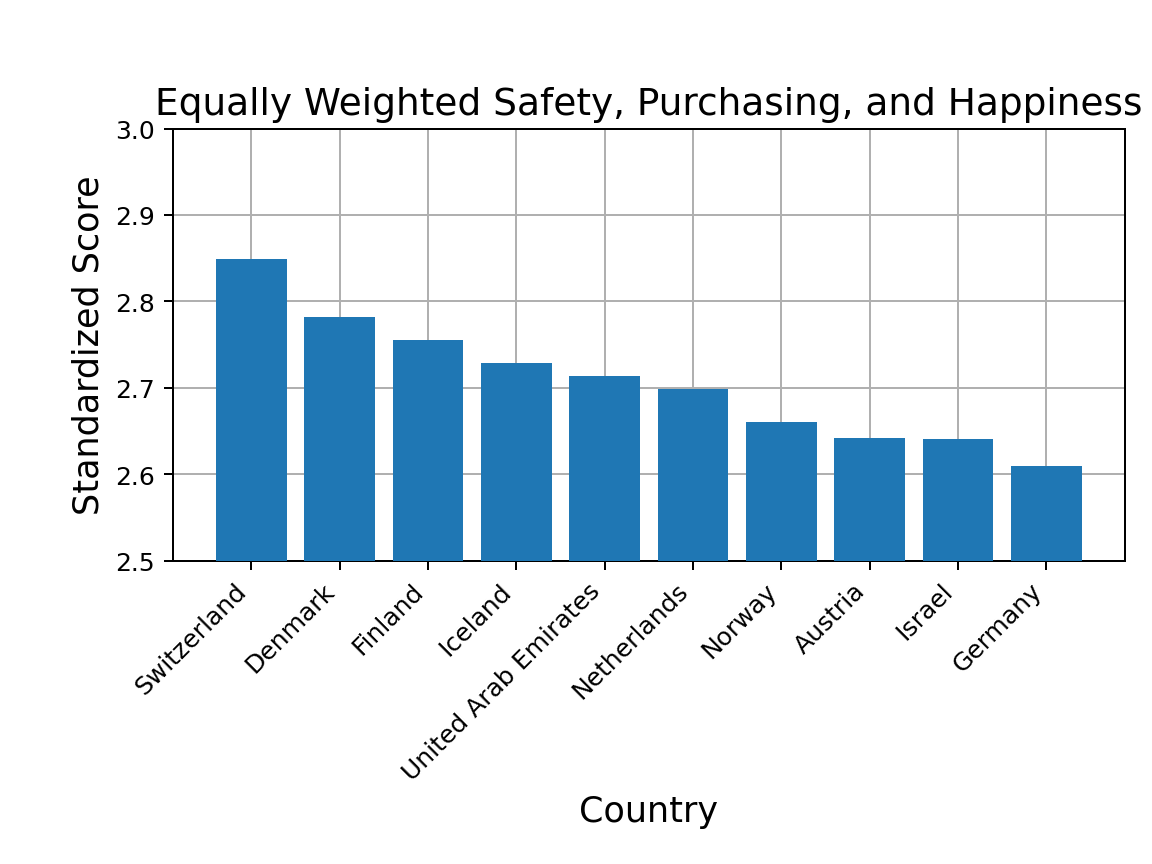

In [184]:
#Equally Weighted
%matplotlib notebook
x = top10EquallyWeighted['Country']
height = top10EquallyWeighted['Equally Weighted Safety, Purchasing, and Happiness']

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Equally Weighted Safety, Purchasing, and Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Standardized Score', fontsize=14)
plt.ylim(2.5, 3)
plt.grid(zorder=0)
plt.show()

<IPython.core.display.Javascript object>


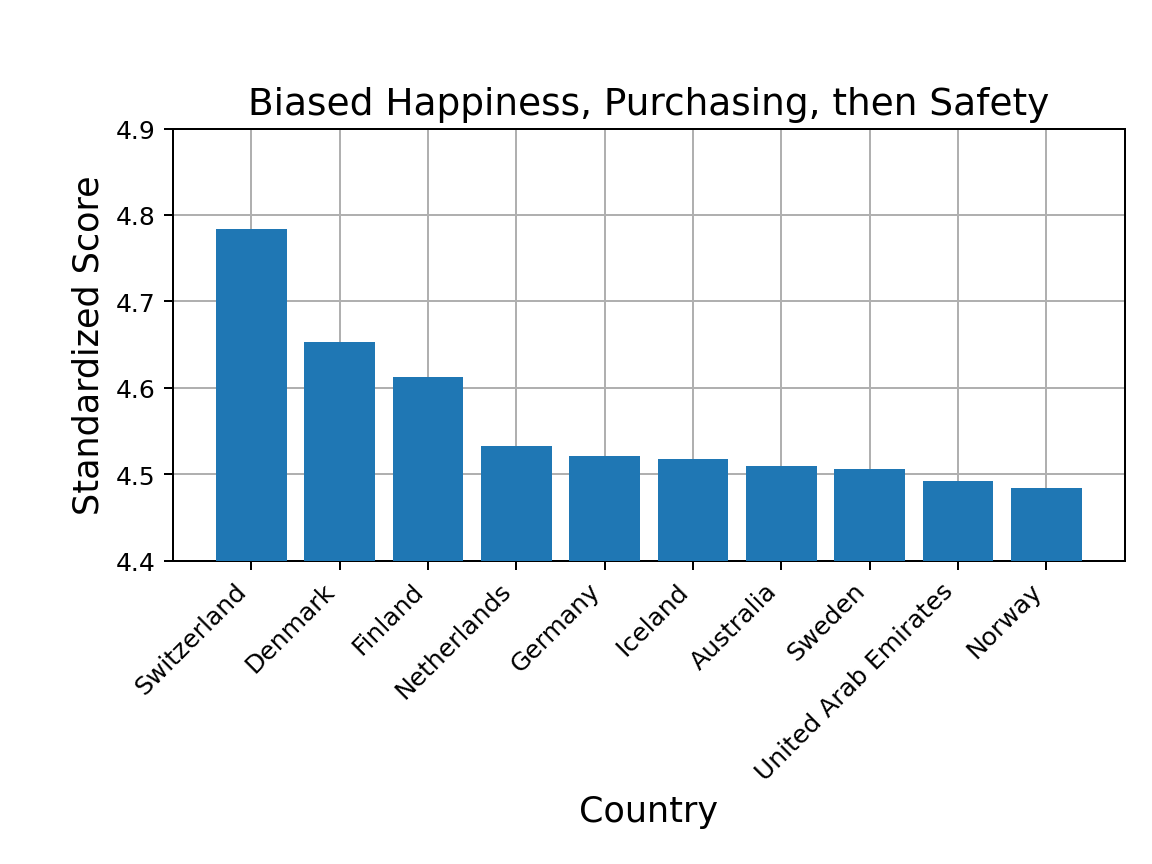

In [185]:
#Happiness 3, purch 2, safety 1
%matplotlib notebook
weightHap = 3
weightPurch = 2
weightSafety = 1
mHapCosCrim['Biased Happiness, Purchasing, then Safety'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Happiness, Purchasing, then Safety', 
                                               ascending=False).head(10)
x = top10Bias['Country']
height = top10Bias['Biased Happiness, Purchasing, then Safety']

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Happiness, Purchasing, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Standardized Score', fontsize=14)
plt.ylim(4.4, 4.9)
plt.grid(zorder=0)
plt.show()

<IPython.core.display.Javascript object>


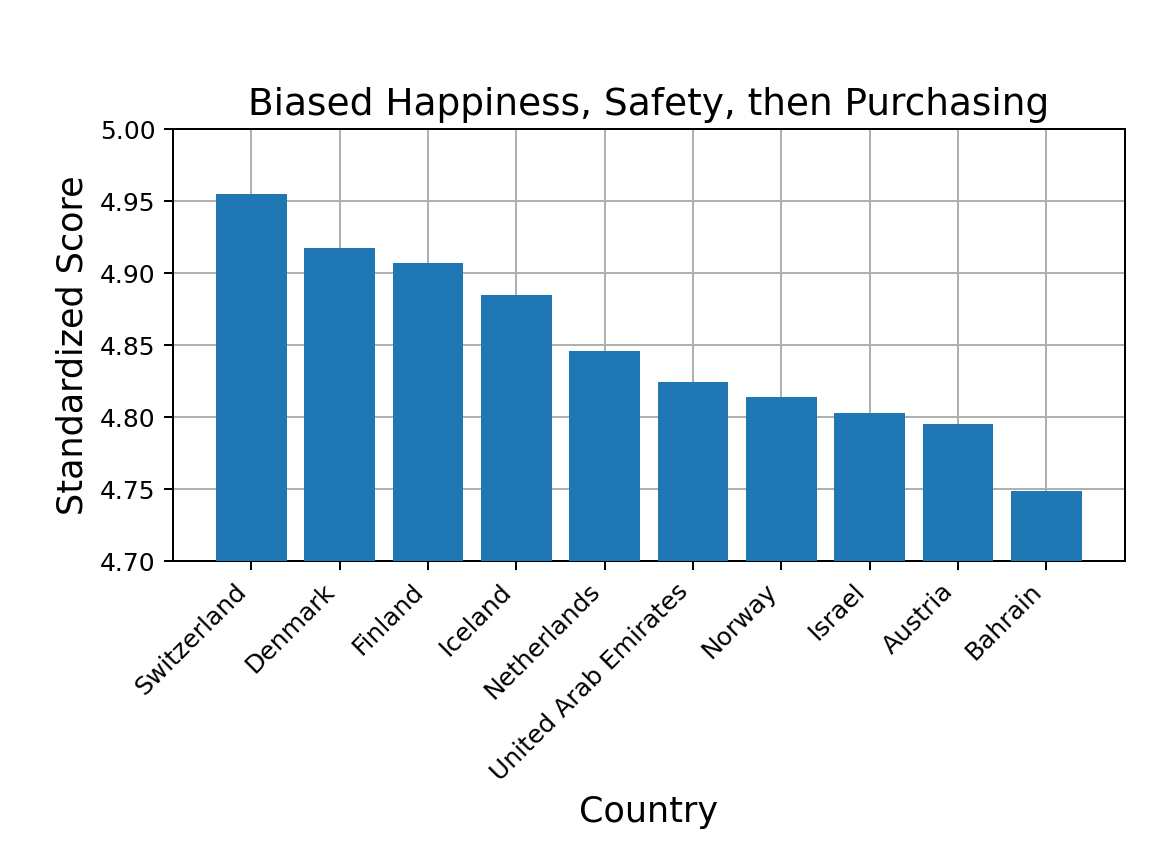

In [186]:
#Happiness 3, purch 1, safety 2
%matplotlib notebook
weightHap = 3
weightPurch = 1
weightSafety = 2
mHapCosCrim['Biased Happiness, Safety, then Purchasing'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Happiness, Safety, then Purchasing', 
                                               ascending=False).head(10)
# print(top10Bias[['Country','Biased Happiness, Safety, then Purchasing']])
x = top10Bias['Country']
height = top10BiasHap2Weighted['Biased Happiness, Safety, then Purchasing']

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Happiness, Safety, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Standardized Score', fontsize=14)
plt.ylim(4.7, 5)
plt.grid(zorder=0)
plt.show()

<IPython.core.display.Javascript object>


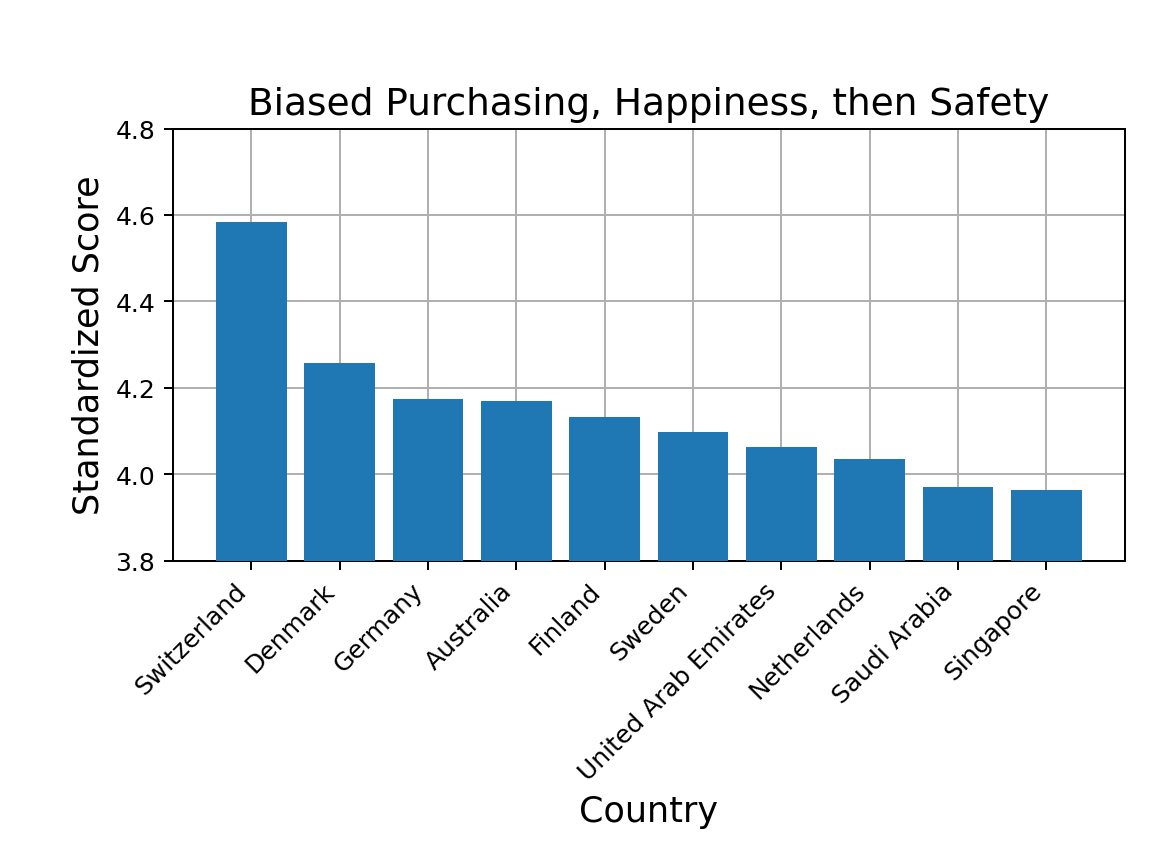

In [187]:
#Happiness 2, purch 3, safety 1
%matplotlib notebook
weightHap = 2
weightPurch = 3
weightSafety = 1
mHapCosCrim['Biased Purchasing, Happiness, then Safety'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Purchasing, Happiness, then Safety', 
                                               ascending=False).head(10)
# print(mHapCosCrim.count())
x = top10Bias['Country']
height = top10Bias['Biased Purchasing, Happiness, then Safety']

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Purchasing, Happiness, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(3.8, 4.8)
plt.ylabel('Standardized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

<IPython.core.display.Javascript object>


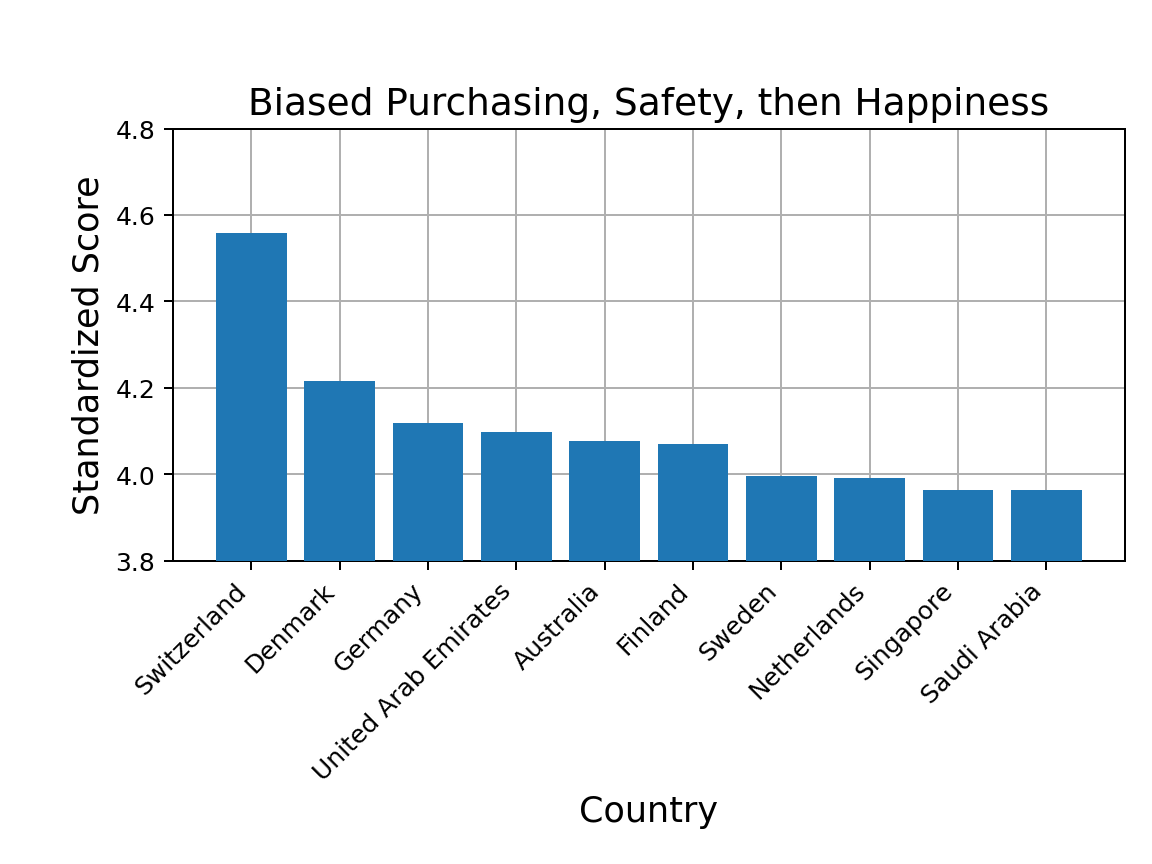

In [188]:
#Happiness 1, purch 3, safety 2
%matplotlib notebook
weightHap = 1
weightPurch = 3
weightSafety = 2
mHapCosCrim['Biased Purchasing, Safety, then Happiness'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Purchasing, Safety, then Happiness', 
                                               ascending=False).head(10)
# print(mHapCosCrim.count())
x = top10Bias['Country']
height = top10Bias['Biased Purchasing, Safety, then Happiness']

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Purchasing, Safety, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(3.8, 4.8)
plt.ylabel('Standardized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

<IPython.core.display.Javascript object>


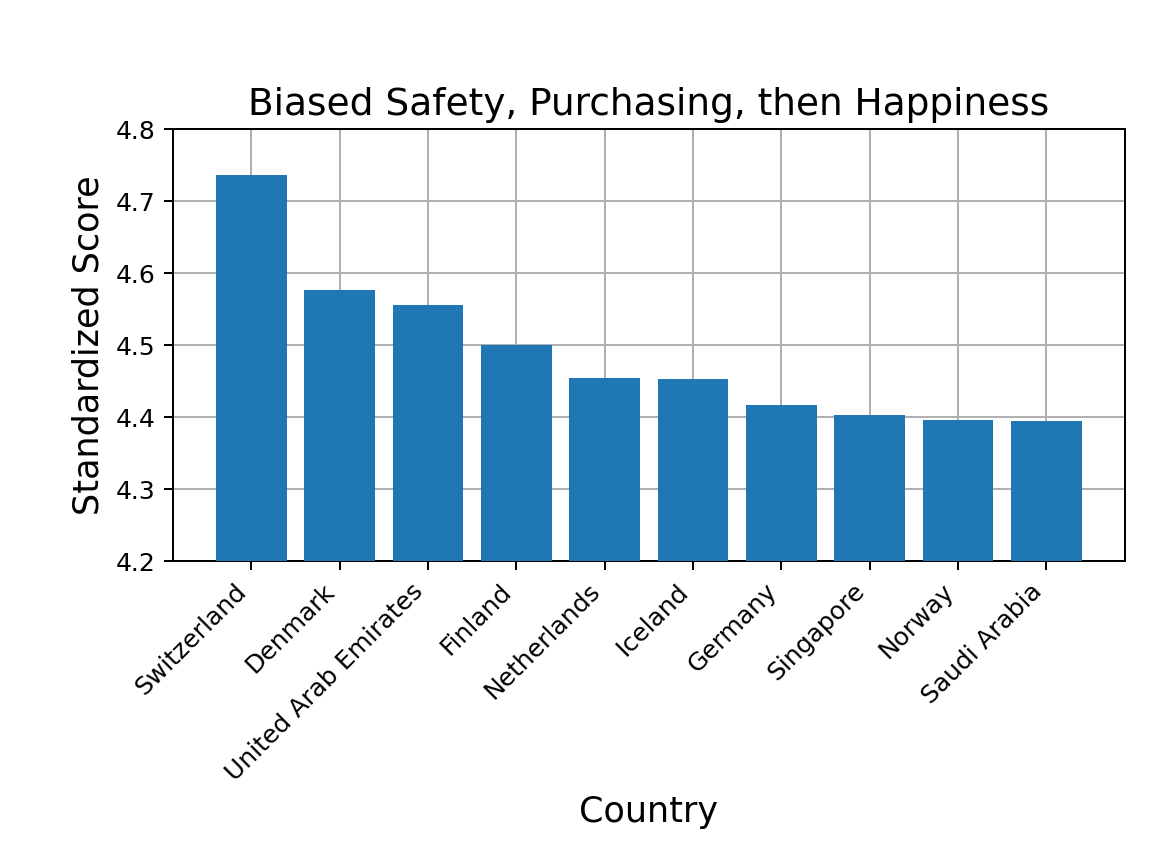

In [189]:
#Happiness 1, purch 2, safety 3
%matplotlib notebook
weightHap = 1
weightPurch = 2
weightSafety = 3
mHapCosCrim['Biased Safety, Purchasing, then Happiness'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Safety, Purchasing, then Happiness', 
                                               ascending=False).head(10)
# print(mHapCosCrim.count())
x = top10Bias['Country']
height = top10Bias['Biased Safety, Purchasing, then Happiness']

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Safety, Purchasing, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(4.2, 4.8)
plt.ylabel('Standardized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

<IPython.core.display.Javascript object>


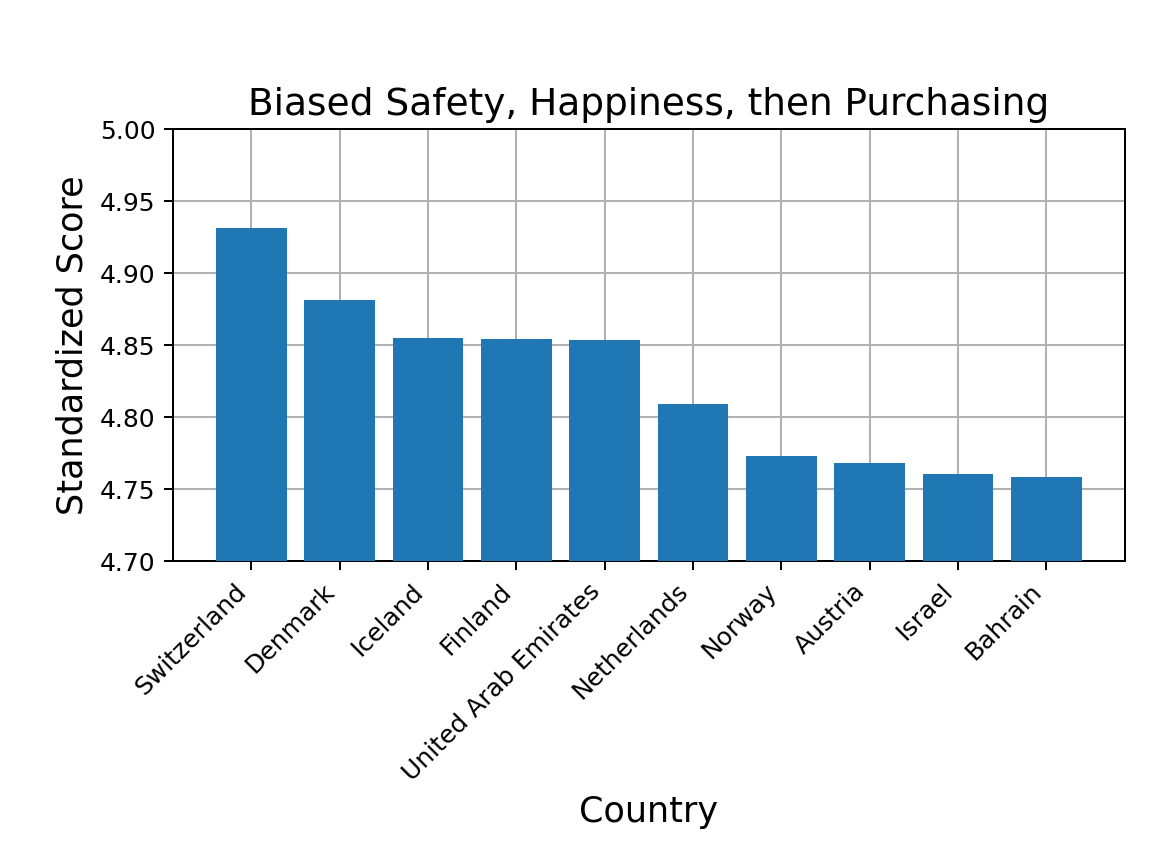

In [190]:
#Happiness 2, purch 1, safety 3
%matplotlib notebook
weightHap = 2
weightPurch = 1
weightSafety = 3
mHapCosCrim['Biased Safety, Happiness, then Purchasing'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Safety, Happiness, then Purchasing', 
                                               ascending=False).head(10)
# print(mHapCosCrim.count())
x = top10Bias['Country']
height = top10Bias['Biased Safety, Happiness, then Purchasing']

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Safety, Happiness, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(4.7, 5)
plt.ylabel('Standardized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

In [199]:
infra_df = pd.read_csv('./Resources/data.csv')
print(infra_df.columns)
infra_df.head()

Index(['Country Name', 'Country Code', 'year',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agricultural machinery, tractors',
       'Agricultural machinery, tractors per 100 sq. km of arable land',
       'Agricultural methane emissions (% of total)',
       'Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
       'Agricultural nitrous oxide emissions (% of total)',
       'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Agricultural raw materials exports (% of merchandise exports)',
       'Agricultural raw materials imports (% of merchandise imports)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (current US$)',
       'Ann

,Country Name,Country Code,year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",...,Permanent cropland (% of land area),"Population, total",Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8996973.0,NaN,NaN,NaN,8241137.0,91.599,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,NaN,NaN,57.745918,377000.0,120.0,0.156863,...,0.076586,9169410.0,NaN,NaN,NaN,8373138.0,91.316,1.589040,NaN,652860.0
2,Afghanistan,AFG,1962,NaN,NaN,NaN,57.837821,377600.0,150.0,0.194805,...,0.091903,9351441.0,NaN,NaN,NaN,8512056.0,91.024,1.645479,NaN,652860.0
3,Afghanistan,AFG,1963,NaN,NaN,NaN,57.914407,378100.0,200.0,0.258065,...,0.091903,9543205.0,NaN,NaN,NaN,8657977.0,90.724,1.699758,NaN,652860.0
4,Afghanistan,AFG,1964,NaN,NaN,NaN,58.010906,378730.0,200.0,0.256410,...,0.111816,9744781.0,NaN,NaN,NaN,8810646.0,90.414,1.747967,NaN,652860.0


In [202]:
infra_df = infra_df[['Country Name', 'Access to electricity (% of population)',
                     'year', 'Literacy rate, adult total (% of people ages 15 and above)', 
                     'Mortality rate, infant (per 1,000 live births)', 'Forest area (% of land area)',
                    'Population, total', 'GDP per capita (current US$)',
                    'Agriculture, forestry, and fishing, value added (% of GDP)']]
infra_df.head()

,Country Name,Access to electricity (% of population),year,"Literacy rate, adult total (% of people ages 15 and above)","Mortality rate, infant (per 1,000 live births)",Forest area (% of land area),"Population, total",GDP per capita (current US$),"Agriculture, forestry, and fishing, value added (% of GDP)"
0,Afghanistan,NaN,1960,NaN,NaN,NaN,8996973.0,59.773194,NaN
1,Afghanistan,NaN,1961,NaN,NaN,NaN,9169410.0,59.860874,NaN
2,Afghanistan,NaN,1962,NaN,232.0,NaN,9351441.0,58.458015,NaN
3,Afghanistan,NaN,1963,NaN,227.8,NaN,9543205.0,78.706388,NaN
4,Afghanistan,NaN,1964,NaN,223.9,NaN,9744781.0,82.095231,NaN


In [204]:
infra_df.count()

Country Name                                                  16104
Access to electricity (% of population)                        6174
year                                                          16104
Literacy rate, adult total (% of people ages 15 and above)     2504
Mortality rate, infant (per 1,000 live births)                11835
Forest area (% of land area)                                   6857
Population, total                                             15671
GDP per capita (current US$)                                  12369
Agriculture, forestry, and fishing, value added (% of GDP)     9694
dtype: int64

In [205]:
infra_df = infra_df.dropna()

In [206]:
infra_df.count()

Country Name                                                  1370
Access to electricity (% of population)                       1370
year                                                          1370
Literacy rate, adult total (% of people ages 15 and above)    1370
Mortality rate, infant (per 1,000 live births)                1370
Forest area (% of land area)                                  1370
Population, total                                             1370
GDP per capita (current US$)                                  1370
Agriculture, forestry, and fishing, value added (% of GDP)    1370
dtype: int64

In [207]:
infra_df['year'].value_counts()

2011    95
2014    90
2010    89
2012    85
2015    79
2007    74
2013    73
2009    72
2016    71
2000    70
2008    68
2006    65
2004    63
2001    63
2005    59
2002    57
2003    50
1999    28
1998    23
1996    20
1997    17
1994    15
1995    13
1992    10
1993    10
1991     7
1990     4
Name: year, dtype: int64

In [210]:
yr_df = infra_df.sort_values('year', ascending=False)
yr_df['year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990], dtype=int64)

In [225]:
top30infra_df = infra_df.sort_values('GDP per capita (current US$)', ascending=False).head(30)
print(top30infra_df['GDP per capita (current US$)'])
print(top30infra_df.dtypes)
print(top30infra_df.count())
print(top30infra_df.head())
x = top30infra_df['year']
fig, ax = plt.subplots()
ax.scatter(top30infra_df['year'], top30infra_df['GDP per capita (current US$)'], c = top30infra_df['GDP per capita (current US$)'])
plt.legend